In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [4]:
df = pd.read_csv('./autos.csv')
df

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [5]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [15]:
component_names = [f'PC{i + 1}' for i in range(X_pca.shape[1])]

In [17]:
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138
...,...,...,...,...
188,0.869097,-0.033610,-0.322867,-0.169687
189,1.784896,-0.335345,0.407270,-0.652607
190,1.938892,-0.096703,-0.051044,0.275515
191,1.137520,-0.032469,-0.826623,-0.219731


In [24]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns
) 
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

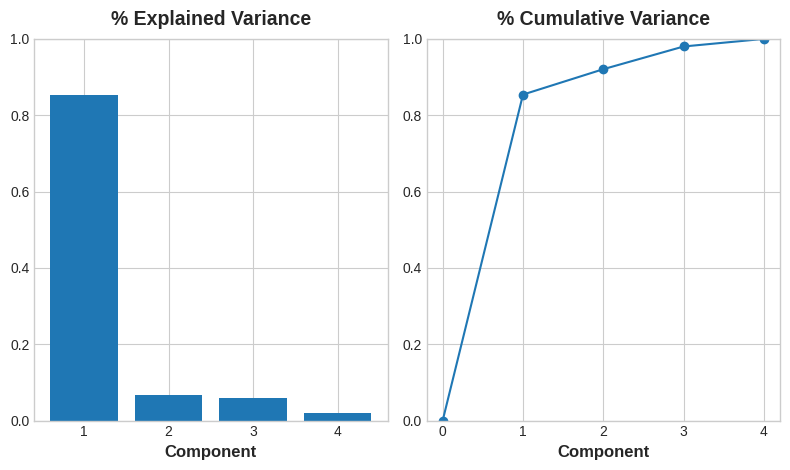

In [28]:
plot_variance(pca)

In [31]:
mi_scores = make_mi_scores(X_pca, y , discrete_features=False)
mi_scores

PC1    1.015073
PC2    0.379388
PC3    0.307032
PC4    0.205226
Name: MI Scores, dtype: float64

In [36]:
idx = X_pca['PC3'].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


<AxesSubplot:xlabel='sports_or_wagon', ylabel='price'>

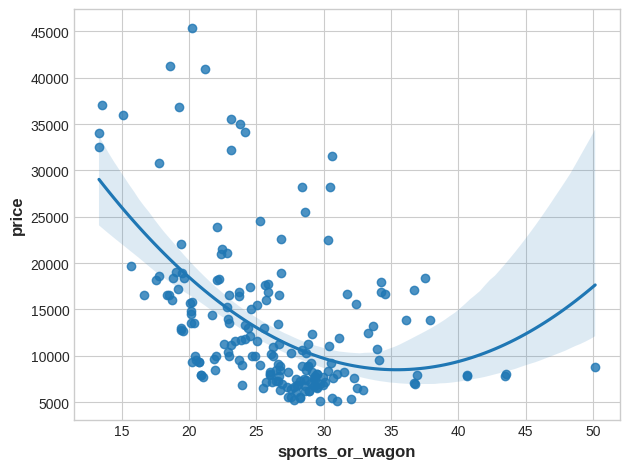

In [38]:
df['sports_or_wagon'] = X.curb_weight / X.horsepower
sns.regplot(x='sports_or_wagon', y='price', data=df, order=2)

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [40]:
def apply_pca(X, standardize=True):
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    pca = PCA()
    X_pca = pca.fit_transform(X)
    component_names = [f'PC{i + 1}' for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(
        X_pca, columns=component_names
    )
    loadings = pd.DataFrame(
        pca.components_.T, 
        columns=component_names,
        index=X.columns
    )
    return pca, X_pca, loadings

In [41]:
def plot_variance(pca, width=8, dpi=100):
  
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
  
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
 
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )

    fig.set(figwidth=8, dpi=100)
    return axs

In [42]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(['object', 'category']):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=False, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [43]:
def score_dataset(X, y, model=XGBRegressor()):
    for colname in X.select_dtypes(['category', 'object']):
        X[colname], _ = X[colname].factorize()
    score = cross_val_score(
        model, X, y, cv=5, scoring='neg_mean_squared_log_error',
    )
    score = -score.mean()
    score = np.sqrt(score)
    return score

In [45]:
df = pd.read_csv('./ames.csv')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,0.0,No_Pool,Good_Privacy,None,0.0,3,2006,WD,Normal,142500
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2006,WD,Normal,131000
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,Shed,700.0,7,2006,WD,Normal,132000
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,No_Fence,None,0.0,4,2006,WD,Normal,170000


In [47]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

In [48]:
print(df[features].corrwith(df.SalePrice))

GarageArea      0.640138
YearRemodAdd    0.532974
TotalBsmtSF     0.632529
GrLivArea       0.706780
dtype: float64


In [49]:
X = df.copy()
y = X.pop('SalePrice')
X = X.loc[:, features]

In [50]:
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.541229  0.102375 -0.038470  0.833733
YearRemodAdd  0.427077 -0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076  0.360778 -0.666836 -0.406192
GrLivArea     0.514294  0.270700  0.742592 -0.332837


In [54]:
X = df.copy()
y = X.pop('SalePrice')

X = X.join(X_pca)

score = score_dataset(X, y)
print(score)
X

0.13706513988898517


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,PC1,PC2,PC3,PC4
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,0,0.0,5,2010,0,0,-0.165346,1.164936,0.233330,0.283527
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,0,0.0,6,2010,0,0,-0.639050,0.649561,-0.622155,1.740770
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,1,12500.0,6,2010,0,0,-0.794227,1.175790,-0.580254,-0.551055
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,0,0.0,4,2010,0,0,1.636658,1.907874,-0.675063,-1.052854
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,0,0.0,3,2010,0,0,0.293648,-0.610856,0.342374,-0.047752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0,37.0,7937.0,0,0,0,0,0,2,...,0,0.0,3,2006,0,0,-0.276496,-0.239255,-0.676658,0.820547
2926,0,0,0.0,8885.0,0,0,0,3,0,1,...,0,0.0,6,2006,0,0,-0.822084,-0.414039,-0.593885,0.620322
2927,4,0,62.0,10441.0,0,0,1,0,0,1,...,2,700.0,7,2006,0,0,-1.730457,-0.951137,-0.501221,-1.417521
2928,0,0,77.0,10010.0,0,0,1,0,0,1,...,0,0.0,4,2006,0,0,-0.049130,0.584898,-0.641779,-0.374198


In [56]:
X = df.copy()
y = X.pop('SalePrice')

X['Feature1'] = X.GrLivArea + X.TotalBsmtSF
X['Feature2'] = X.YearRemodAdd + X.TotalBsmtSF

score = score_dataset(X, y)
print(score)
X

0.13528009260753748


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Feature1,Feature2
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,0,0,0,0.0,5,2010,0,0,2736.0,3040.0
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,0,1,0,0.0,6,2010,0,0,1778.0,2843.0
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,0,0,1,12500.0,6,2010,0,0,2658.0,3287.0
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,0,0,0,0.0,4,2010,0,0,4220.0,4078.0
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,0,1,0,0.0,3,2010,0,0,2557.0,2926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0,37.0,7937.0,0,0,0,0,0,2,...,0,2,0,0.0,3,2006,0,0,2006.0,2987.0
2926,0,0,0.0,8885.0,0,0,0,3,0,1,...,0,1,0,0.0,6,2006,0,0,1766.0,2847.0
2927,4,0,62.0,10441.0,0,0,1,0,0,1,...,0,1,2,700.0,7,2006,0,0,1882.0,2904.0
2928,0,0,77.0,10010.0,0,0,1,0,0,1,...,0,0,0,0.0,4,2006,0,0,2778.0,3364.0


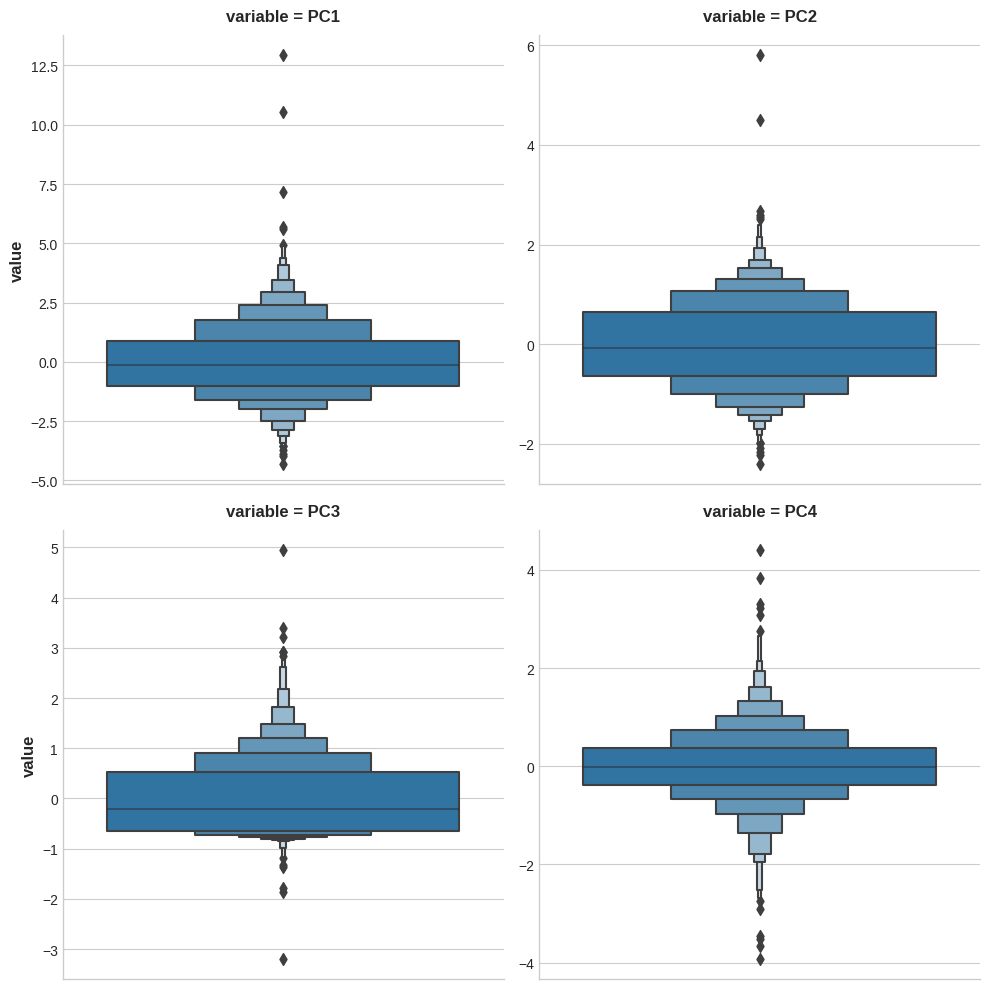

In [57]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

In [64]:
idx = X_pca['PC1'].sort_values(ascending=False).index
df.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

,SalePrice,Neighborhood,SaleCondition,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
1498,160000,Edwards,Partial,1418.0,2008,6110.0,5642.0
2180,183850,Edwards,Partial,1154.0,2009,5095.0,5095.0
2181,184750,Edwards,Partial,884.0,2008,3138.0,4676.0
1760,745000,Northridge,Abnorml,813.0,1996,2396.0,4476.0
1767,755000,Northridge,Normal,832.0,1995,2444.0,4316.0
...,...,...,...,...,...,...,...
662,59000,Old_Town,Normal,0.0,1950,416.0,599.0
2679,80500,Brookside,Normal,0.0,1950,0.0,912.0
2879,51689,Iowa_DOT_and_Rail_Road,Abnorml,0.0,1950,0.0,729.0
780,63900,Sawyer,Normal,0.0,1950,0.0,660.0
